In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = {
    "cooking": pd.read_csv('../dataset/processed/cooking.csv'),
    "crypto": pd.read_csv('../dataset/processed/crypto.csv'),
    "robotics": pd.read_csv('../dataset/processed/robotics.csv'),
    "biology": pd.read_csv('../dataset/processed/biology.csv'),
    "travel": pd.read_csv('../dataset/processed/travel.csv'),
    "diy": pd.read_csv('../dataset/processed/diy.csv'),
    #"physics": pd.read_csv('physics.csv'),
}

from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import math
import sys
import random
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe verdadeira')
    plt.xlabel('Classe prevista')

In [2]:
data = []
for file in df:
    for i in range(df[file].shape[0]):
        if type(df[file].iloc[i]['title']) is str:
            data.append(df[file].iloc[i]['title'])
        if type(df[file].iloc[i]['content']) is str:
            data.append(df[file].iloc[i]['content'])

In [3]:
X = []
y = []
for file in df:
    for i in range(2000):
        if type(df[file].iloc[i]['content']) is str:
            X.append(df[file].iloc[i]['content'])
            y.append(file)
            
X_test = []
y_test = []
for file in df:
    for i in range(2001,2501):#range(df[file].shape[0]):
        if type(df[file].iloc[i]['content']) is str:
            X_test.append(df[file].iloc[i]['content'])
            y_test.append(file)
            

Vocabulary size: 832
Confusion matrix, without normalization
[[444  37   4   3   4   8]
 [  2 492   3   0   3   0]
 [  6 166 293  14   4  17]
 [ 47 193  18 228   8   6]
 [ 22  49   5   3 419   2]
 [ 44  41  28   0   4 383]]


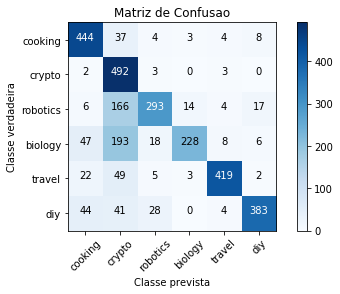

Accuracy: 0.753


In [4]:
sv = CountVectorizer(binary=True, max_df=0.025, min_df=0.005)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 488
Confusion matrix, without normalization
[[461  23   0   1   3  12]
 [  7 484   5   1   3   0]
 [ 71 260 128  11   6  24]
 [134 188  18 140   7  13]
 [ 71  41   8   4 369   7]
 [116  26  17   5   5 331]]


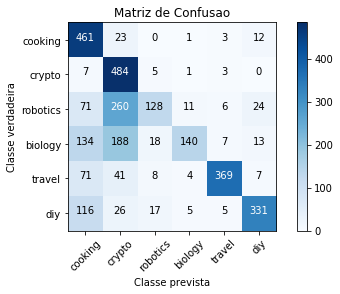

Accuracy: 0.6376666666666667


In [5]:
sv = CountVectorizer(binary=True, max_df=0.4, min_df=0.01)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 980
Confusion matrix, without normalization
[[449  34   4   3   3   7]
 [  2 493   2   0   3   0]
 [  6 163 298  14   3  16]
 [ 46 182  17 238   9   8]
 [ 18  34   7   4 435   2]
 [ 48  28  30   1   3 390]]


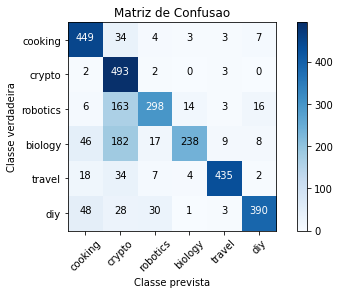

Accuracy: 0.7676666666666667


In [6]:
sv = CountVectorizer(binary=True, max_df=0.9, min_df=0.005)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 7277
Confusion matrix, without normalization
[[459   8   5   7   6  15]
 [  1 488   6   2   3   0]
 [  4  22 457   4   3  10]
 [ 38  30  26 366  30  10]
 [  9   3   7   8 470   3]
 [ 24  10  51   5  16 394]]


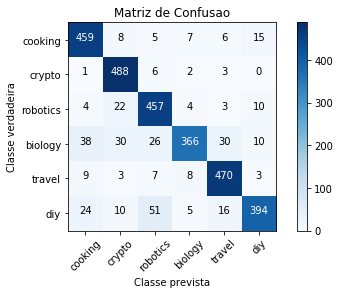

Accuracy: 0.878


In [7]:
sv = CountVectorizer(binary=True, max_df=0.3, min_df=50)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 9541
Confusion matrix, without normalization
[[463   5   3   8   8  13]
 [  1 486   8   3   1   1]
 [  4  20 457   5   1  13]
 [ 30  22  26 385  29   8]
 [  9   4   8  10 467   2]
 [ 23   7  46   7  15 402]]


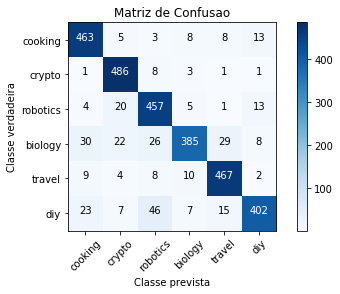

Accuracy: 0.8866666666666667


In [8]:
sv = CountVectorizer(binary=True, max_df=0.4, min_df=30)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 11733
Confusion matrix, without normalization
[[464   5   2   9   7  13]
 [  1 486   8   3   1   1]
 [  2  17 463   5   2  11]
 [ 29  16  26 395  24  10]
 [ 10   4   7  11 465   3]
 [ 22   6  43   7  11 411]]


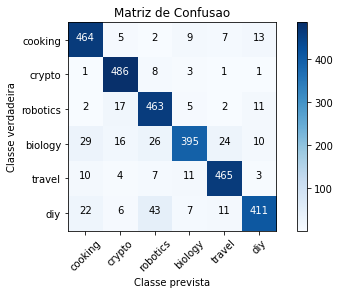

Accuracy: 0.8946666666666667


In [9]:
sv = CountVectorizer(binary=True, max_df=0.5, min_df=20)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 16506
Confusion matrix, without normalization
[[465   4   3   8   7  13]
 [  0 487   7   4   1   1]
 [  2  16 465   5   1  11]
 [ 24  14  26 398  23  15]
 [  9   5  10   6 466   4]
 [ 20   6  41   8   9 416]]


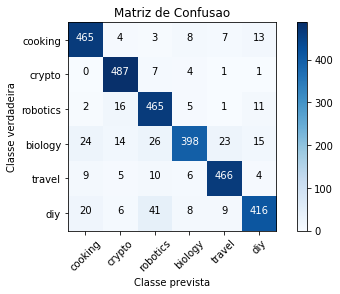

Accuracy: 0.899


In [12]:
sv = CountVectorizer(binary=True, max_df=0.6, min_df=10)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 23303
Confusion matrix, without normalization
[[467   2   4   8   6  13]
 [  0 487   6   5   1   1]
 [  2  15 466   5   1  11]
 [ 23  13  27 401  19  17]
 [  9   5  10   5 467   4]
 [ 20   6  38   9   7 420]]


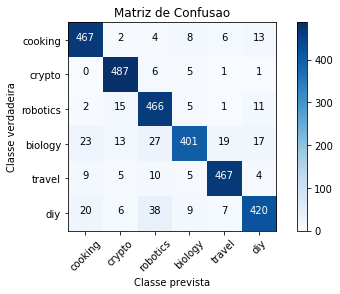

Accuracy: 0.9026666666666666


In [14]:
sv = CountVectorizer(binary=True, max_df=0.7, min_df=5)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))

Vocabulary size: 40087
Confusion matrix, without normalization
[[470   0   4   7   5  14]
 [  0 487   6   5   1   1]
 [  3  13 461   5   1  17]
 [ 24  11  25 402  19  19]
 [  9   5   9   6 461  10]
 [ 22   4  15   9   3 447]]


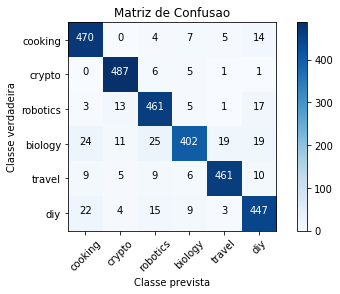

Accuracy: 0.9093333333333333


In [18]:
sv = CountVectorizer(binary=True, max_df=0.7, min_df=2)
d = sv.fit(data)

X_ = sv.transform(X)
X_test_ = sv.transform(X_test)

print('Vocabulary size: ' + str(len(sv.vocabulary_)))

nb = GaussianNB()
nb.fit(X_.toarray(), y)
result = nb.predict(X_test_.toarray())

# Making the Confusion Matrix
cm = confusion_matrix(y_test, result, labels=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'])
#class_names = ['A','B','C','D','E','F','G','H']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cooking', 'crypto', 'robotics', 'biology', 'travel', 'diy'], title='Matriz de Confusao')
plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, result)))